In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

2023-05-14 03:13:25.892845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 03:13:26.834200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

2023-05-14 03:13:28.545356: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 30s 99ms/step - loss: 0.2418 - accuracy: 0.9317 - val_loss: 0.0814 - val_accuracy: 0.9737
Epoch 2/10
300/300 [==============================] - 30s 100ms/step - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.0475 - val_accuracy: 0.9856
Epoch 3/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 4/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 5/10
300/300 [==============================] - 31s 105ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 6/10
300/300 [==============================] - 29s 97ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 7/10
300/300 [==============================] - 29s 96ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0318 - val_accurac

In [7]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.05%


313/313 [==============================] - 2s 5ms/step


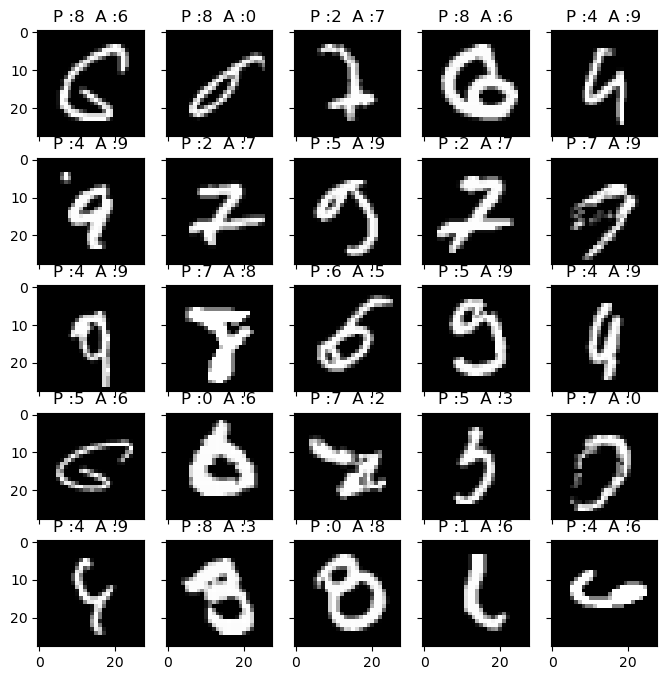

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Predict the values from the test data
y_pred = model.predict(X_test)

# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] => 2
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test observations from one hot vectors to labels
y_true = np.argmax(y_test, axis=1)

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

# Create function to display images that model predicted incorrectly
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 25 images with their predicted and real labels"""
    n = 0
    nrows = 5
    ncols = 5
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(8, 8))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)), cmap='gray')
            ax[row, col].set_title("P :{}  A :{}".format(pred_errors[error], obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, y_pred_classes_errors, y_true_errors)


In [9]:
model.save("mnist_cnn.h5")